Resolution vs Ei


In [1]:
cd ~/dv/sns-chops/resolution/SEQUOIA/

/SNS/users/lj7/dv/sns-chops/resolution/SEQUOIA


In [2]:
import numpy as np, os, sys, glob
from matplotlib import pyplot as plt
from mcni.utils import conversion as C

In [3]:
%matplotlib notebook

In [4]:
import pandas as pd
import numpy as np
import scipy as sp
import plotly.plotly as py

# Exp data

In [5]:
sys.path.insert(0, os.path.abspath('./PyChop/'))

In [6]:
import Vdata2018
reload(Vdata2018)

<module 'Vdata2018' from '/SNS/users/lj7/dv/sns-chops/resolution/SEQUOIA/PyChop/Vdata2018.pyc'>

In [7]:
expdata_all = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_All-IPTS_22666.dat'))

reading data. please wait...
  done


In [8]:
def sorted_xy_byx(x,y):
    s = np.argsort(x)
    return np.array(x)[s], np.array(y)[s]

In [9]:
unique_nominal_Eis = set( list(expdata_all.Ei_list) )
unique_nominal_Eis = sorted(list(unique_nominal_Eis))

See https://jupyter.sns.gov/user/lj7/notebooks/dv/sns-chops/resolution/SEQUOIA/intensity_scale_factor-dataset%202.ipynb how this was calculated

In [10]:
expdata_all.intensity *= 580000

# PyChop - not done yet

In [11]:
sys.path.insert(0, "/SNS/users/lj7/dv")

In [12]:
from PyChop import PyChop2

In [13]:
import PyChop

In [14]:
instrument = PyChop2('PyChop/cncs.yaml')

RuntimeError: Cannot open file PyChop/cncs.yaml . Error is [Errno 2] No such file or directory: 'PyChop/cncs.yaml'

In [ ]:
# instrument.setChopper('High Resolution')
#instrument.getResFlux(Etrans=0, Ei_in=10)

<IPython.core.display.Javascript object>


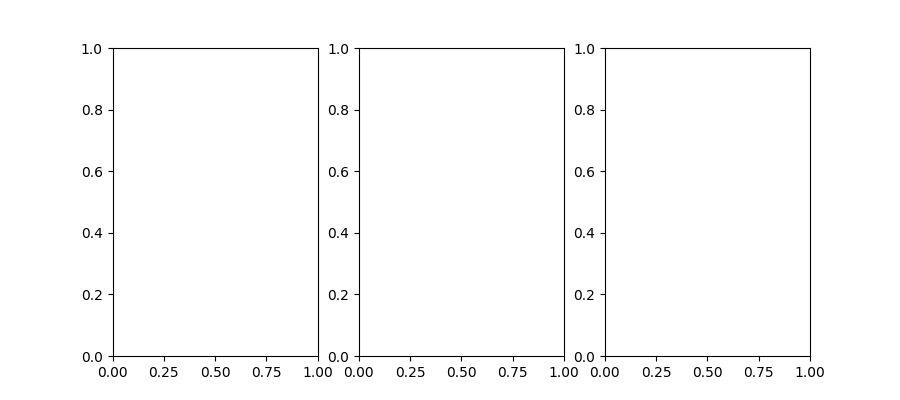

NameError: name 'expdata_highres' is not defined

In [15]:
def decorate(ax):
    ax.grid(True, which='minor')
    ax.grid(True, which='major')
    ax.set_xlabel('Ei(meV)')
    ax.set_ylabel('FWHM(meV)')
    ax.legend()
    return

fig, ax = plt.subplots(1, 3, figsize=(9,4))

x,y = sorted_xy_byx(expdata_highres.Ei_list, expdata_highres.FWHM)
ax[0].loglog(x,y, '+-', label='High resolution')
instrument.setChopper('High Resolution')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_, frequency=180.)[0][0] for _ in x]
ax[0].loglog(x,y_pychop, '+-', label='High resolution - PyChop')
decorate(ax[0])

x,y = sorted_xy_byx(expdata_interm.Ei_list, expdata_interm.FWHM)
ax[1].loglog(x,y, '^-', label='All intermediate')
instrument.setChopper('Intermediate')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_,  frequency=240.)[0][0] for _ in x]
ax[1].loglog(x,y_pychop, '^-', label='All intermediate - PyChop')
decorate(ax[1])

x,y = sorted_xy_byx(expdata_highflux.Ei_list, expdata_highflux.FWHM)
ax[2].loglog(x,y, 'o-', label='High flux')
instrument.setChopper('High Flux')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_,  frequency=300.)[0][0] for _ in x]
ax[2].loglog(x,y_pychop, 'o-', label='High Flux - PyChop')
decorate(ax[2])


# plotly

In [16]:
import plotly, plotly.plotly as py, plotly.figure_factory as ff, plotly.graph_objs as go

In [17]:
expdata_all.vdata

,#,RunNumber,Energy,Ei,chopper_choice,Chopper1,Chopper2,Chopper3,Height,FWHM,Sigma,Q
0,0.0,168960.0,12.0,12.295410,0.0,120.0,240.0,30.0,0.130466,0.240990,0.102331,0.968694
1,0.0,168961.0,12.0,12.234767,0.0,120.0,300.0,30.0,0.055940,0.203097,0.086241,0.966821
2,0.0,168962.0,20.0,20.637666,0.0,120.0,240.0,60.0,0.167331,0.499432,0.212073,1.254047
3,0.0,168963.0,30.0,31.170122,0.0,120.0,240.0,60.0,0.152744,0.872763,0.370600,1.540039
4,0.0,168964.0,20.0,20.517740,0.0,120.0,300.0,60.0,0.132493,0.439080,0.186446,1.251185
5,0.0,168965.0,30.0,30.961821,0.0,120.0,300.0,60.0,0.156778,0.767853,0.326052,1.535991
6,0.0,168966.0,20.0,20.434208,0.0,120.0,360.0,60.0,0.079384,0.380076,0.161391,1.249188
7,0.0,168967.0,30.0,30.805882,0.0,120.0,360.0,60.0,0.129550,0.714696,0.303480,1.532953
8,0.0,168968.0,45.0,47.121620,0.0,120.0,240.0,90.0,0.091071,1.517316,0.644296,1.891955
9,0.0,168969.0,45.0,46.743039,0.0,120.0,300.0,90.0,0.106456,1.308805,0.555756,1.885963


## Use code for old data

In [18]:
chopper_choices = ['highres', 'highflux']
chopper_choice_labels = ['High resolution', 'High flux']

### FWHM vs Ei

In [20]:
chopper_choice_labels = ['High resolution, FWHM ~ 3%Ei', 'High flux, FWHM ~ 8.5%Ei  for Ei < 1eV']

data =[]
extra_info = dict(
#    chopper_freqs = ('nu', '%sHz')
    RunNumber = ('RunNumber', '%d')
)

expdata = expdata_all

for i in range(2):
    title = chopper_choice_labels[i]
    plot = expdata.createPlotXY_on_condition(
        expdata.vdata.chopper_choice==i, 'Ei', 'FWHM', extra_info=extra_info)
    plot.name = title
    data.append(plot)
    continue
layout = dict(
    title='SEQUOIA resolution', 
    # showlegend=False,
    xaxis=dict(
        title='Incident energy (meV)',
        type='log',
    ),
    yaxis=dict(
        title='Resolutioin (meV)',
        type='log',
    )
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='SEQUOIA resolution - IPTS-22666')

/SNS/software/miniconda2/envs/spida/lib/python2.7/site-packages/plotly/tools.py:1418: UserWarning:

Looks like you used a newline character: '\n'.

Plotly uses a subset of HTML escape characters
to do things like newline (<br>), bold (<b></b>),
italics (<i></i>), etc. Your newline characters 
have been converted to '<br>' so they will show 
up right on your Plotly figure!

/SNS/software/miniconda2/envs/spida/lib/python2.7/site-packages/plotly/tools.py:1418: UserWarning:

Looks like you used a newline character: '\n'.

Plotly uses a subset of HTML escape characters
to do things like newline (<br>), bold (<b></b>),
italics (<i></i>), etc. Your newline characters 
have been converted to '<br>' so they will show 
up right on your Plotly figure!

/SNS/software/miniconda2/envs/spida/lib/python2.7/site-packages/plotly/tools.py:1418: UserWarning:

Looks like you used a newline character: '\n'.

Plotly uses a subset of HTML escape characters
to do things like newline (<br>), bold (<b></b>),
ita

### Flux vs Ei

In [21]:
data =[]
extra_info = dict(
#    chopper_freqs = ('nu', '%sHz')
    RunNumber = ('RunNumber', '%d')
)

expdata = expdata_all

for i in range(2):
    title = chopper_choice_labels[i]
    plot = expdata.createPlotXY_on_condition(
        expdata.vdata.chopper_choice==i, 'Ei', 'intensity', extra_info=extra_info)
    plot.name = title
    data.append(plot)
    continue
layout = dict(
    title='SEQUOIA flux', 
    # showlegend=False,
    xaxis=dict(
        title='Incident energy (meV)',
        type='log',
    ),
    yaxis=dict(
        title='Intensity (arb. unit)',
        type='log',
    )
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='SEQUOIA flux - IPTS-22666')

/SNS/software/miniconda2/envs/spida/lib/python2.7/site-packages/plotly/tools.py:1418: UserWarning:

Looks like you used a newline character: '\n'.

Plotly uses a subset of HTML escape characters
to do things like newline (<br>), bold (<b></b>),
italics (<i></i>), etc. Your newline characters 
have been converted to '<br>' so they will show 
up right on your Plotly figure!

/SNS/software/miniconda2/envs/spida/lib/python2.7/site-packages/plotly/tools.py:1418: UserWarning:

Looks like you used a newline character: '\n'.

Plotly uses a subset of HTML escape characters
to do things like newline (<br>), bold (<b></b>),
italics (<i></i>), etc. Your newline characters 
have been converted to '<br>' so they will show 
up right on your Plotly figure!

/SNS/software/miniconda2/envs/spida/lib/python2.7/site-packages/plotly/tools.py:1418: UserWarning:

Looks like you used a newline character: '\n'.

Plotly uses a subset of HTML escape characters
to do things like newline (<br>), bold (<b></b>),
ita

## New data

### Flux vs FWHM

In [22]:
expdata = expdata_all

In [23]:
chopper_choice_labels = ['High resolution', 'High flux']

Ei_start = 95.

# find Ei that has more than one data points
Eis = []
for n_Ei in unique_nominal_Eis:
    good = False
    for chopper_index in range(2):
        condition = (expdata.vdata.chopper_choice==chopper_index)*(expdata.vdata.Energy==n_Ei)
        if condition.sum() > 1: 
            good = True; break
    if not good: continue
    Eis.append(n_Ei)
    continue
    
title='SEQ flux (intensity) vs resolution \nuse dropdown list from left to choose incident energy'
data =[]
buttons = []
all_hidden = [False] * len(Eis) * 2 # FC 1 and 2
extra_info = dict(
    chopper_freqs = ('nu', '%sHz'),
#    FWHM_percentages = ('Resolution percentage', '%.1f%%'),
    RunNumber = ('Run no.', '%d'),
    Chopper3 = ('T0 chopper', '%d')
)
# max_res_percentage = 15.
plot_opts = dict(extra_info=extra_info) #, max_res_percentage=max_res_percentage)
for i, n_Ei in enumerate(Eis):
    for chopper_index in range(2):
        condition = (expdata.vdata.chopper_choice==chopper_index)*(expdata.vdata.Energy==n_Ei)
        # condition *= (expdata_all.intensity>min_flux))
        plot = expdata_all.createPlotXY_on_condition(
            condition, 'FWHM', 'intensity', **plot_opts)
        plot.visible = False
        plot.name = chopper_choice_labels[chopper_index]
        data.append(plot)
    #
    visible = list(all_hidden)
    visible[2*i] = True; visible[2*i+1] = True
    #
    button =  dict(
        label = '%smeV' % n_Ei,
        method = 'update',
        args = [{'visible': visible},
                {'title': 'Ei=%smeV %s' % (n_Ei, title),
                }])
    buttons.append(button)
    continue

updatemenus = list([
    dict(active=-1,
         buttons=list(buttons)
        )
])

atEi = Eis.index(Ei_start)
data[atEi*2].visible = data[atEi*2+1].visible = True

layout = dict(
    title=title, 
    # showlegend=False, 
    updatemenus=updatemenus,
    xaxis=dict(
        title='FWHM (meV)',
        showspikes=True,
    ),
    yaxis=dict(
        title='Flux -- Peak area (neutrons/s/cm^2/MW)',
        showspikes=True,
    ),
    hovermode="closest",
    showlegend=True,
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='SEQ flux (intensity) vs resolution')

/SNS/software/miniconda2/envs/spida/lib/python2.7/site-packages/pandas/core/computation/expressions.py:180: UserWarning:

evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead

/SNS/software/miniconda2/envs/spida/lib/python2.7/site-packages/pandas/core/computation/expressions.py:180: UserWarning:

evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead

/SNS/software/miniconda2/envs/spida/lib/python2.7/site-packages/pandas/core/computation/expressions.py:180: UserWarning:

evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead

/SNS/software/miniconda2/envs/spida/lib/python2.7/site-packages/pandas/core/computation/expressions.py:180: UserWarning:

evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead

/SNS/software/miniconda2/envs/spida/lib/pyth

/SNS/software/miniconda2/envs/spida/lib/python2.7/site-packages/pandas/core/computation/expressions.py:180: UserWarning:

evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead

/SNS/software/miniconda2/envs/spida/lib/python2.7/site-packages/pandas/core/computation/expressions.py:180: UserWarning:

evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead

/SNS/software/miniconda2/envs/spida/lib/python2.7/site-packages/pandas/core/computation/expressions.py:180: UserWarning:

evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead

/SNS/software/miniconda2/envs/spida/lib/python2.7/site-packages/pandas/core/computation/expressions.py:180: UserWarning:

evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead

/SNS/software/miniconda2/envs/spida/lib/pyth

### FWHM vs Ei, with different chopper settings

In [72]:
chopper_choice_labels = ['High resolution', 'High flux']
freqs = np.arange(60., 601., 60.)

data =[]
extra_info = dict(
    chopper_freqs = ('nu', '%sHz'),
    RunNumber = ('RunNumber', '%d')
)

expdata = expdata_all
colors = [(255,0,0), (0,100,0), (0,0,255), (150, 150,0),
          (0,255,255), (255,0,255), (100,100,100),
          (100,255,255), (255,100,255), (150,150,50),
         ]
for i in range(2):
    opacity = i*1.
    for ifreq, freq in enumerate(freqs):
        title = chopper_choice_labels[i]
        color = colors[ifreq]
        marker = dict(
            color = 'rgba(%s, %s, %s, %s)' % (color + (opacity,)),
            size = 10,
            line = dict(
                color = 'rgb(%s,%s,%s)' % color,
                width = 2
            )
        )
        condition = (expdata.vdata.chopper_choice==i)*(expdata.chopper_freqs==freq)
        condition *= (expdata.vdata.FWHM/expdata.vdata.Ei) < 0.5
        plot = expdata.createPlotXY_on_condition(condition, 'Ei', 'FWHM', extra_info=extra_info)
        plot.marker = marker
        plot.name = title
        plot.showlegend = False
        if ifreq == 0: plot.showlegend = True
        data.append(plot)
    continue
layout = dict(
    title='SEQUOIA resolution', 
    # showlegend=False,
    xaxis=dict(
        title='Incident energy (meV)',
        type='log',
    ),
    yaxis=dict(
        title='Resolutioin (meV)',
        type='log',
    )
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='SEQUOIA resolution - chopper_freq_separated - IPTS-22666')

### Flux vs Ei, with different chopper settings

In [16]:
chopper_choice_labels = ['High resolution', 'High flux']
freqs = np.arange(60., 601., 60.)

data =[]
extra_info = dict(
    chopper_freqs = ('nu', '%sHz'),
    RunNumber = ('RunNumber', '%d')
)

expdata = expdata_all
colors = [(255,0,0), (0,100,0), (0,0,255), (150, 150,0),
          (0,255,255), (255,0,255), (100,100,100),
          (100,255,255), (255,100,255), (150,150,50),
         ]
for i in range(2):
    opacity = i*1.
    for ifreq, freq in enumerate(freqs):
        title = chopper_choice_labels[i]
        color = colors[ifreq]
        marker = dict(
            color = 'rgba(%s, %s, %s, %s)' % (color + (opacity,)),
            size = 10,
            line = dict(
                color = 'rgb(%s,%s,%s)' % color,
                width = 2
            )
        )
        condition = (expdata.vdata.chopper_choice==i)*(expdata.chopper_freqs==freq)
        condition *= (expdata.vdata.FWHM/expdata.vdata.Ei) < 0.5
        plot = expdata.createPlotXY_on_condition(condition, 'Ei', 'intensity', extra_info=extra_info)
        plot.marker = marker
        plot.name = title
        plot.showlegend = False
        if ifreq == 0: plot.showlegend = True
        data.append(plot)
    continue
layout = dict(
    title='SEQUOIA flux', 
    # showlegend=False,
    xaxis=dict(
        title='Incident energy (meV)',
        type='log',
    ),
    yaxis=dict(
        title='Flux (neutrons/s/cm^2/MW)',
        type='log',
    )
)
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='SEQUOIA flux - chopper_freq_separated - IPTS-22666')